In [1]:
curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (2981387359.py, line 1)

In [2]:
gunzip SUSY.csv.gz

SyntaxError: invalid syntax (3064529354.py, line 1)

In [3]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M  100  879M    0     0  51.1M      0  0:00:17  0:00:17 --:--:-- 53.0M5M    0     0  45.0M      0  0:00:19  0:00:04  0:00:15 45.0M


In [4]:
ls -lh

total 6734744
-rw-r--r--  1 alyssajuarez  staff   1.4M Mar 24 17:02 Lab 5.ipynb
-rw-r--r--  1 alyssajuarez  staff   2.2G Mar 24 17:23 SUSY.csv
-rw-r--r--  1 alyssajuarez  staff   880M Mar 24 17:25 SUSY.csv.gz
-rw-r--r--  1 alyssajuarez  staff   5.9K Mar 24 17:22 Untitled.ipynb
-rw-r--r--  1 alyssajuarez  staff   107M Mar 24 17:25 test.csv


In [5]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

In [6]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

In [7]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [8]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [9]:
FeatureNames

['M_TR_2',
 'M_Delta_R',
 'cos_theta_r1',
 'MET_rel',
 'axial_MET',
 'dPhi_r_b',
 'R',
 'MT2',
 'S_R',
 'M_R']

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df = pd.read_csv(filename, dtype='float64', names=VarNames)

In [12]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


In [13]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

# Part 3

l_1_pT


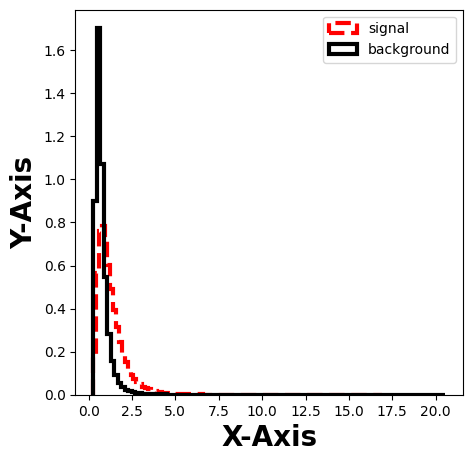

l_1_eta


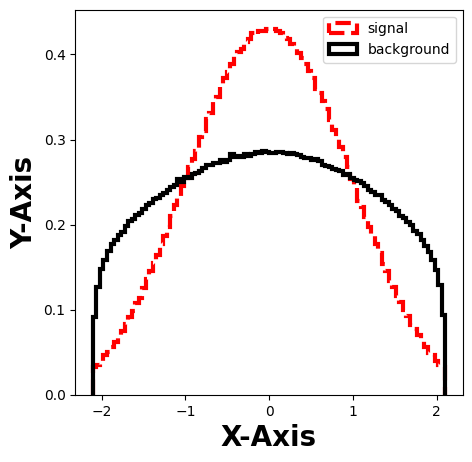

l_1_phi


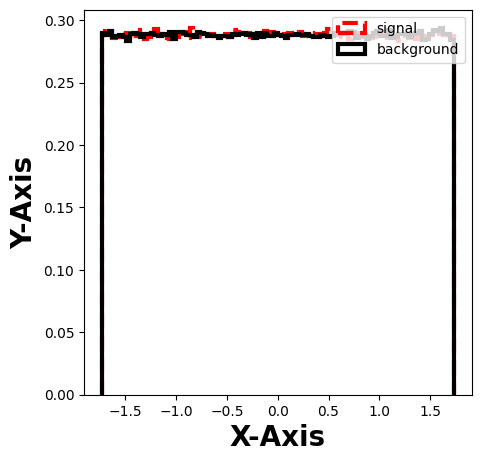

l_2_pT


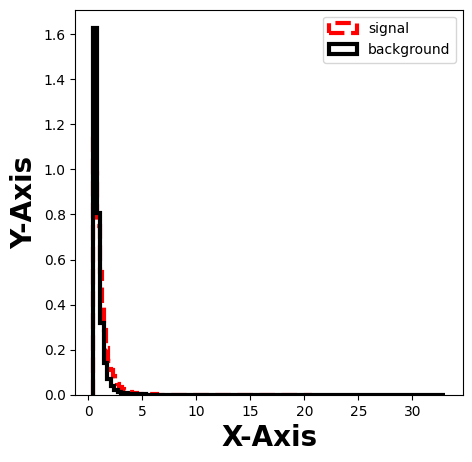

l_2_eta


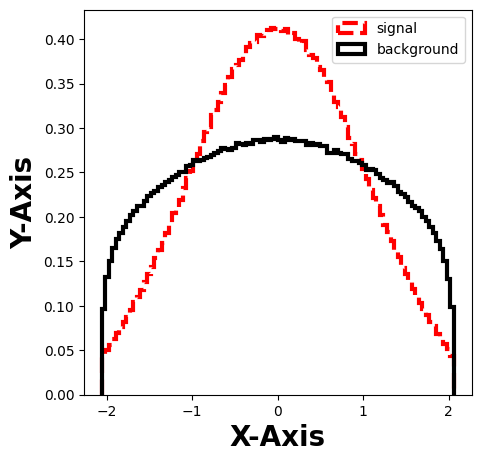

l_2_phi


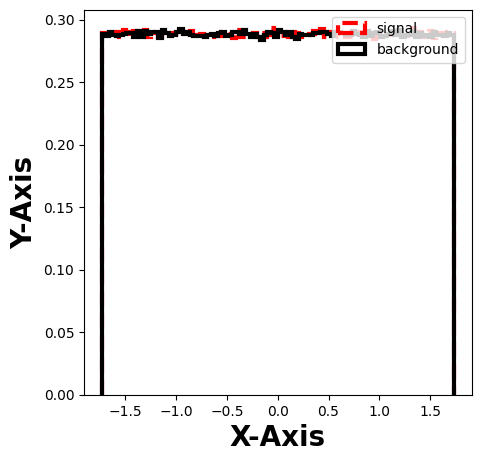

MET


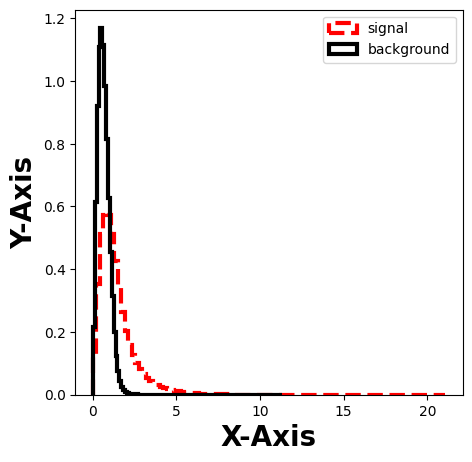

MET_phi


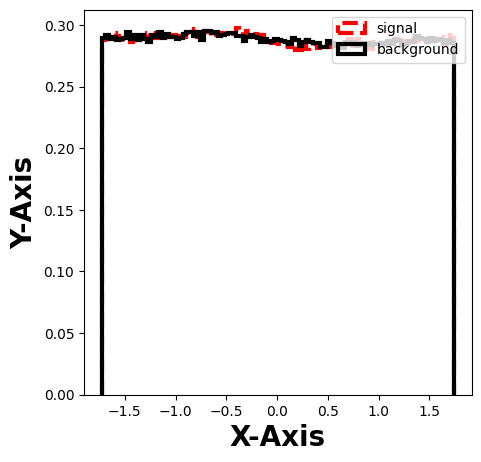

MET_rel


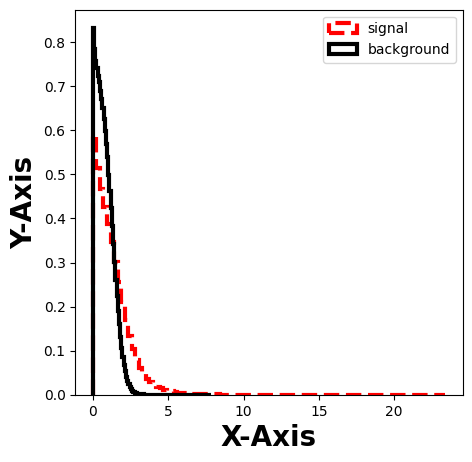

axial_MET


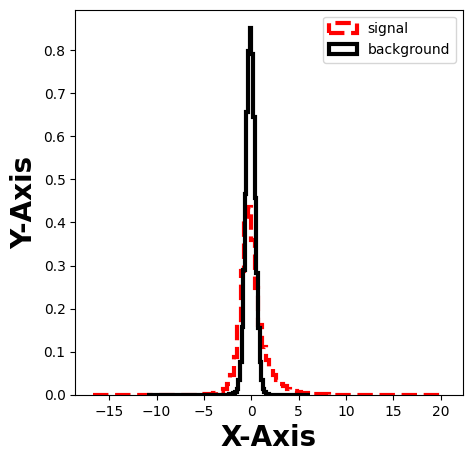

M_R


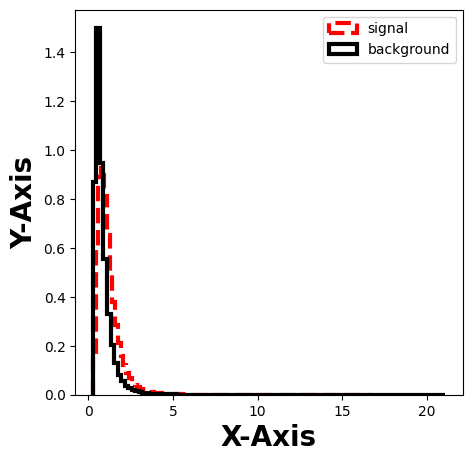

M_TR_2


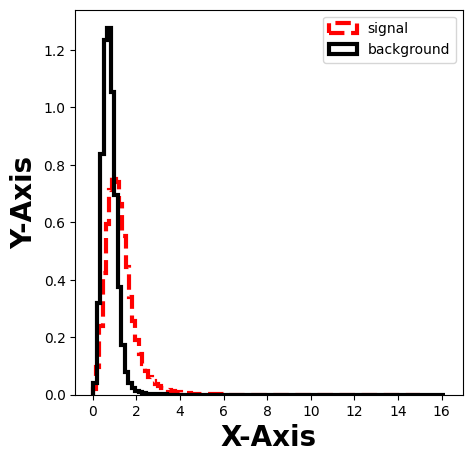

R


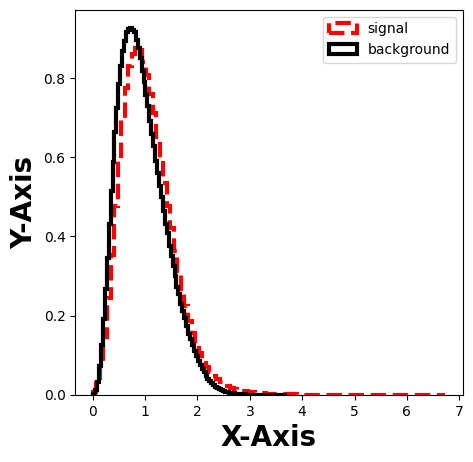

MT2


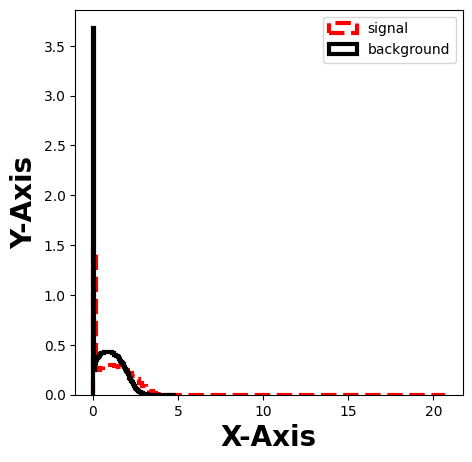

S_R


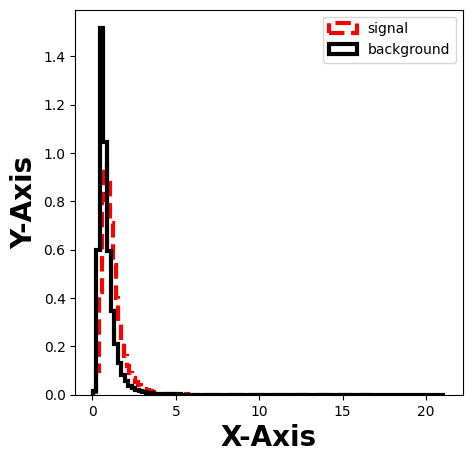

M_Delta_R


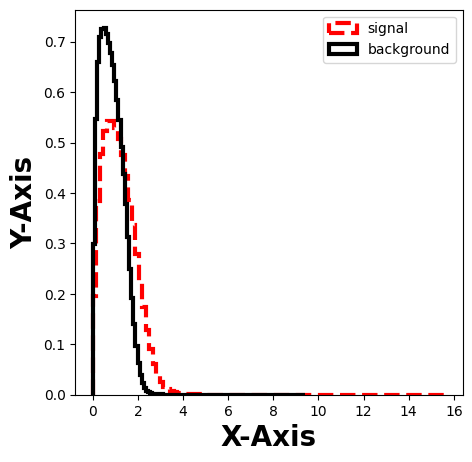

dPhi_r_b


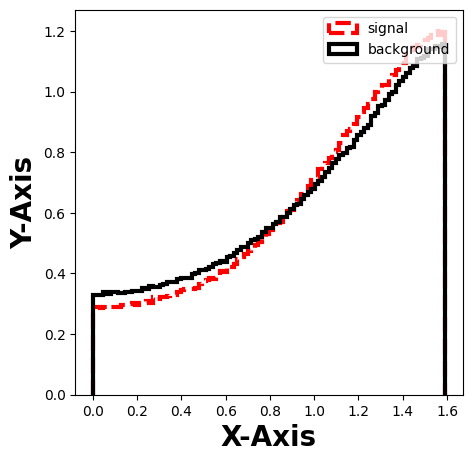

cos_theta_r1


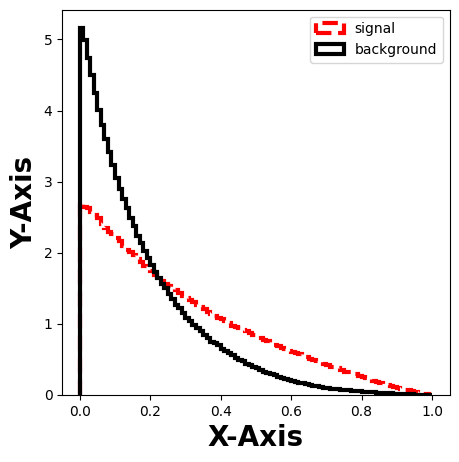

In [38]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(5,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red", linewidth = 3, linestyle = "dashed", label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="black", linewidth = 3, label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.xlabel('X-Axis', fontsize = 20, fontweight = 'bold')
    plt.ylabel('Y-Axis', fontsize = 20, fontweight = 'bold')
    plt.show()

# Part 4

## 4.1

## A

In [41]:
def compare_distributions(df,column_name,selections,**kwargs):
    for label,selection in selections.items():        
        _=plt.hist(df[selection][column_name],label=label,stacked=True,**kwargs)
        #plt.show()

    _=plt.legend()

signal


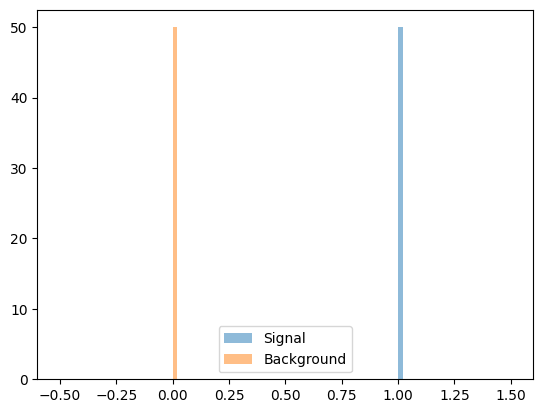

l_1_pT


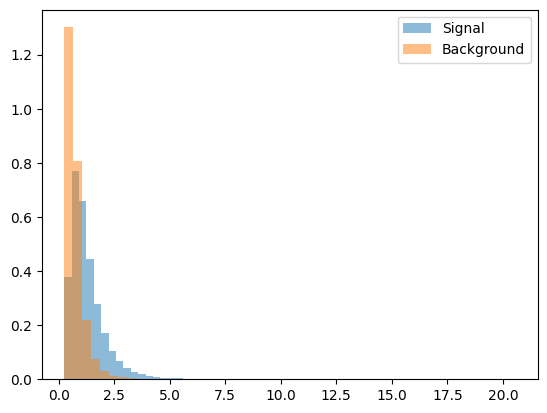

l_1_eta


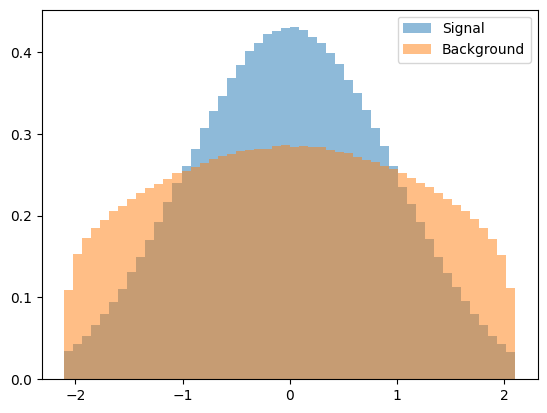

l_1_phi


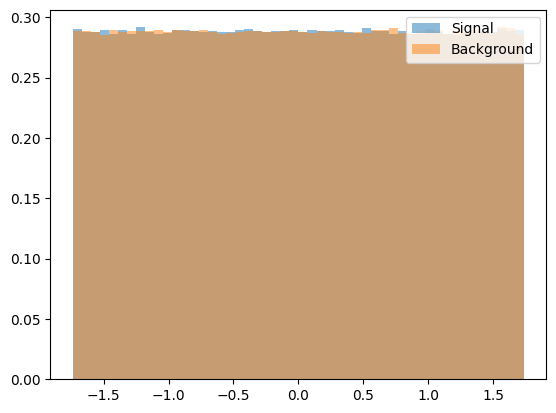

l_2_pT


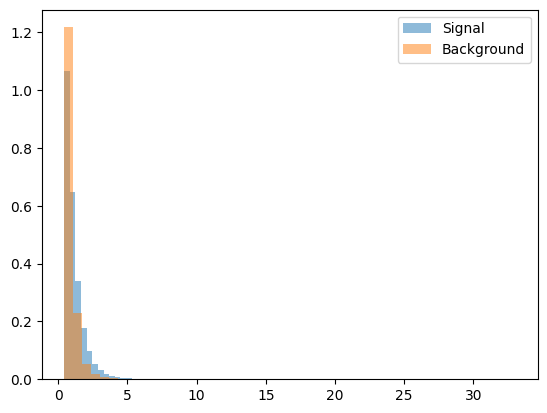

l_2_eta


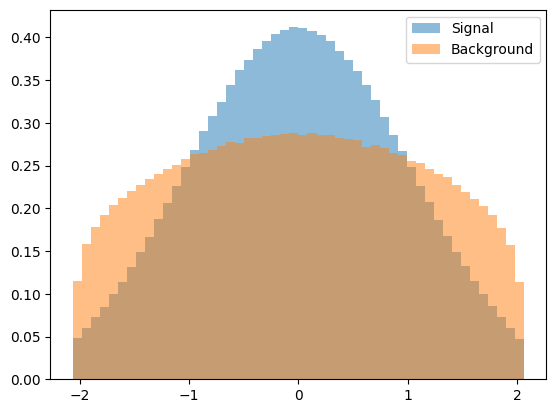

l_2_phi


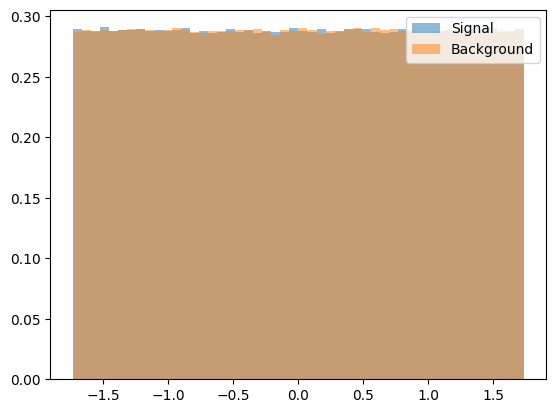

MET


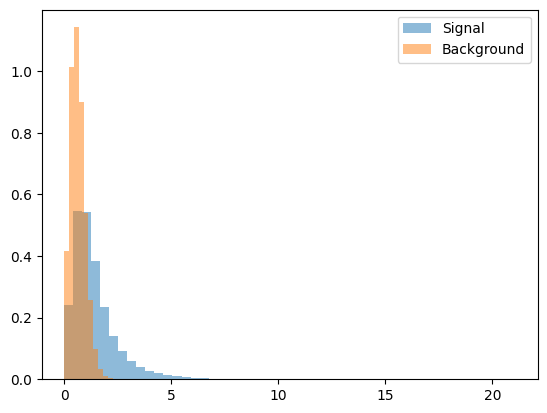

MET_phi


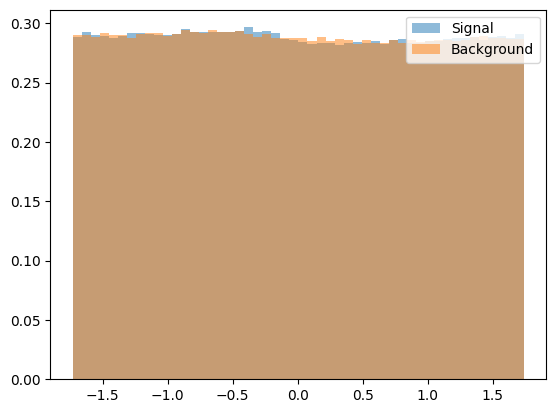

MET_rel


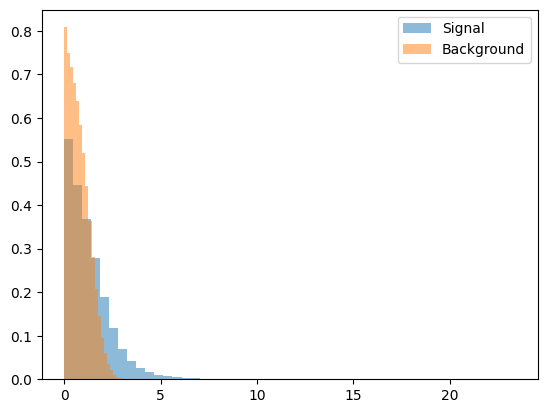

axial_MET


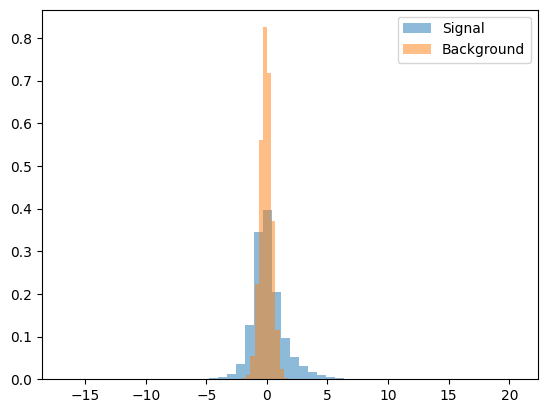

M_R


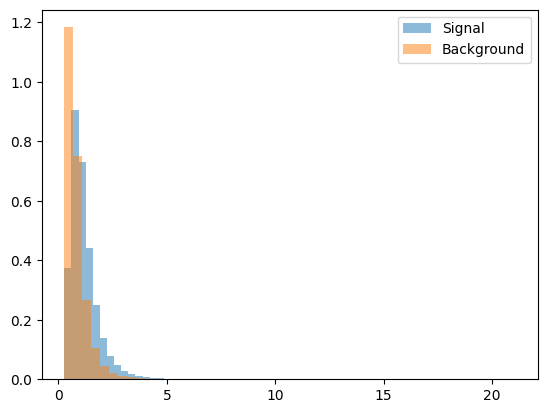

M_TR_2


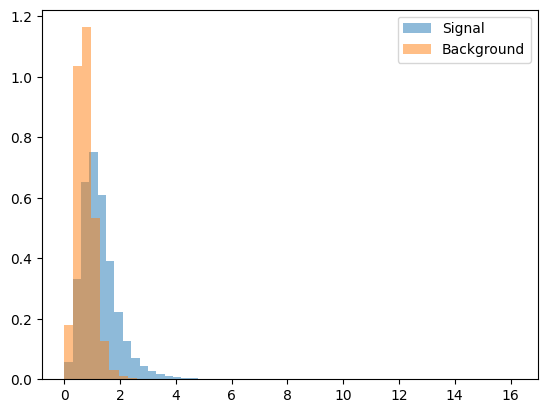

R


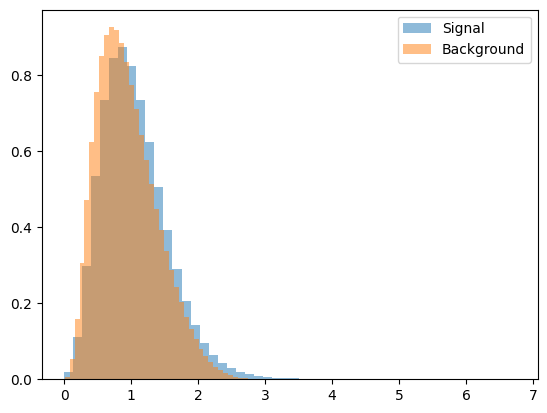

MT2


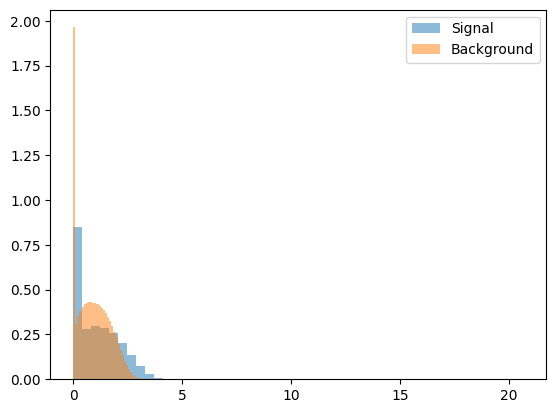

S_R


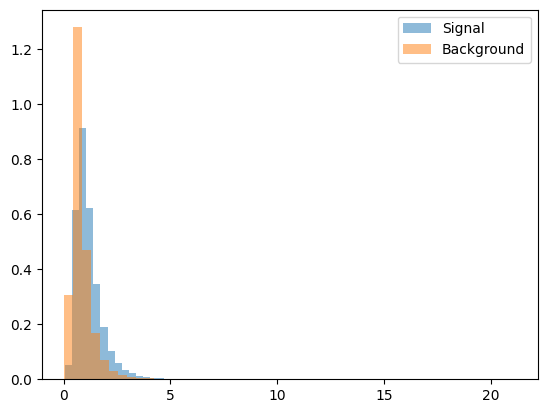

M_Delta_R


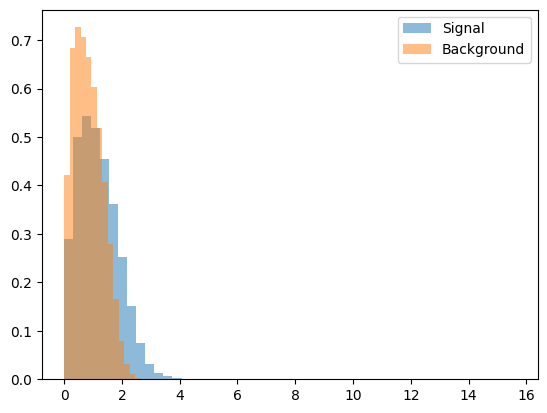

dPhi_r_b


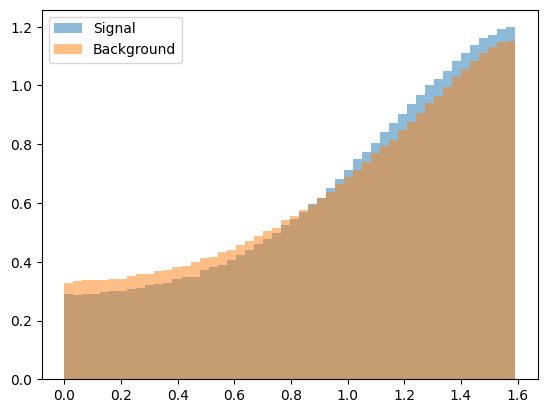

cos_theta_r1


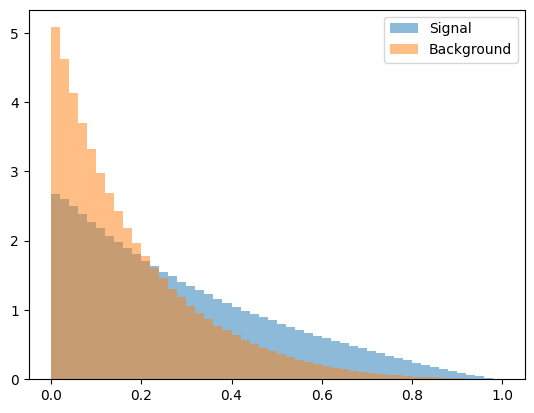

In [58]:
selection_dict={"Signal":df["signal"]==1.,"Background":df["signal"]!=1}

for column_name in df.columns:
    print(column_name)
    compare_distributions(df,column_name,
                     selection_dict,
                     alpha=0.5,
                     density=1,
                     bins=50,
                     )
    plt.show()

In [56]:
d = pd.read_csv("training.zip")
d
data = d.drop(["EventId"], axis = 1)
data["Label"].replace(('s', 'b'), (1, 0), inplace=True)
data

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,1
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,0
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,0
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,0
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,55.892,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,4.505083,0
249996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,50.618,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,2.497259,0
249997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,120.462,...,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.018636,1
249998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,55.859,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.681611,0


DER_mass_MMC


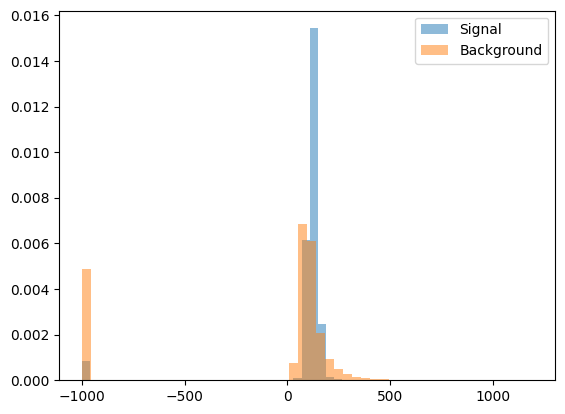

DER_mass_transverse_met_lep


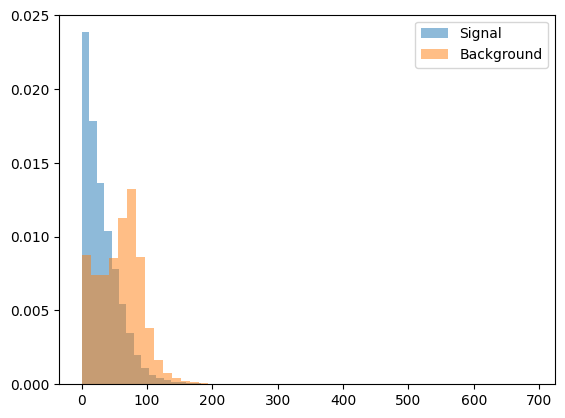

DER_mass_vis


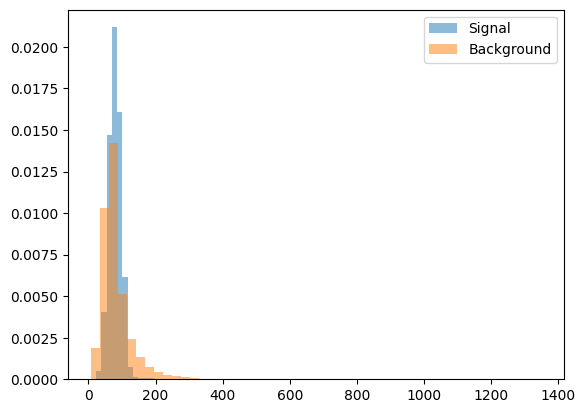

DER_pt_h


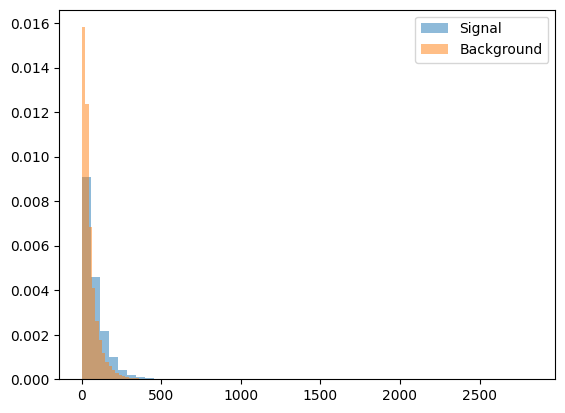

DER_deltaeta_jet_jet


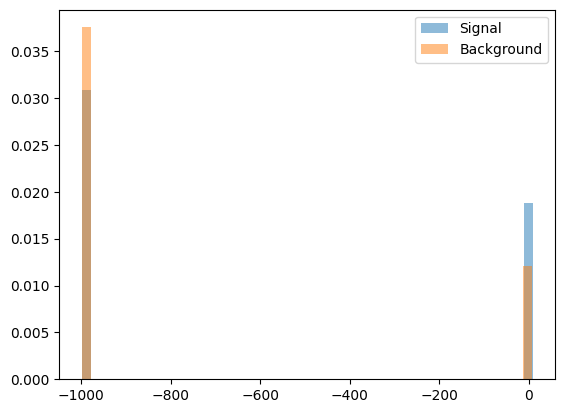

DER_mass_jet_jet


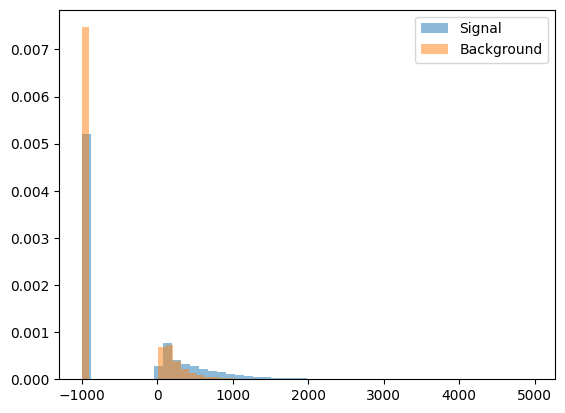

DER_prodeta_jet_jet


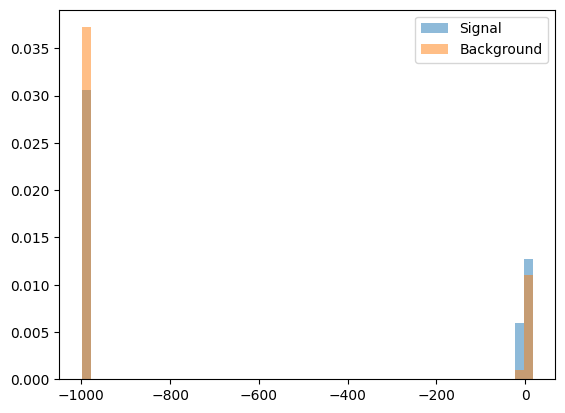

DER_deltar_tau_lep


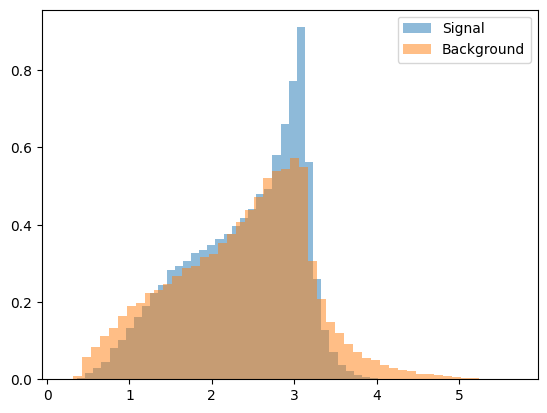

DER_pt_tot


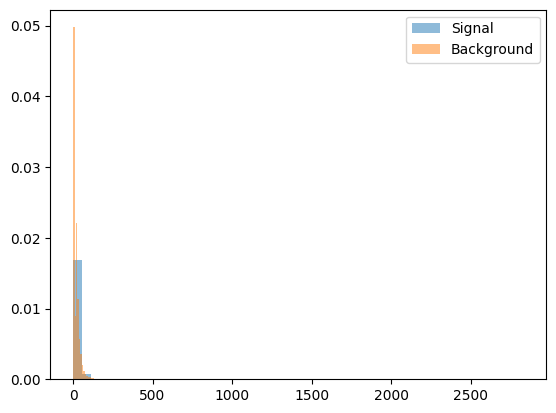

DER_sum_pt


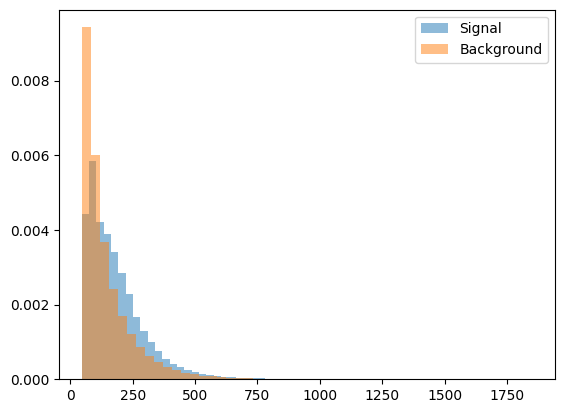

DER_pt_ratio_lep_tau


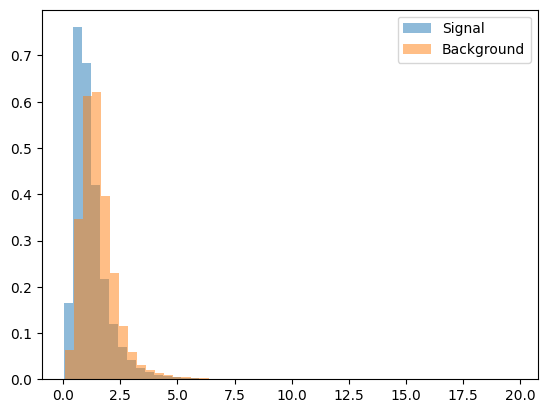

DER_met_phi_centrality


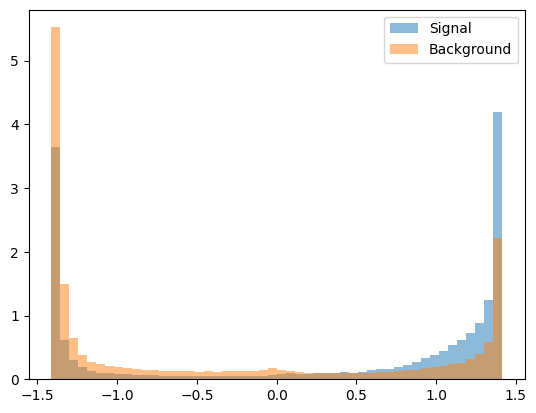

DER_lep_eta_centrality


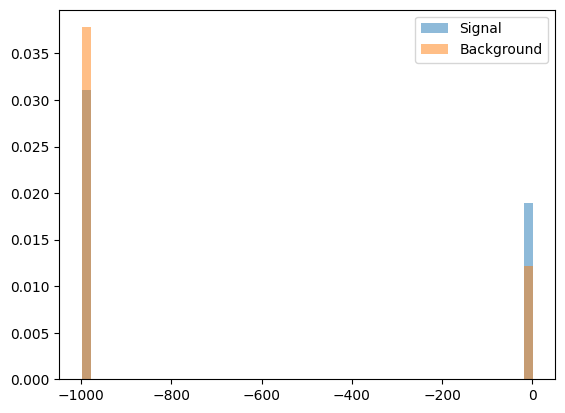

PRI_tau_pt


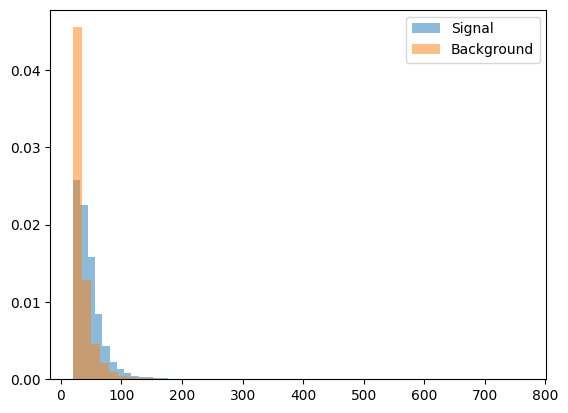

PRI_tau_eta


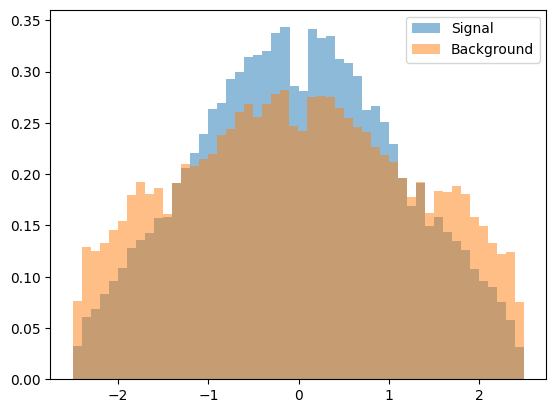

PRI_tau_phi


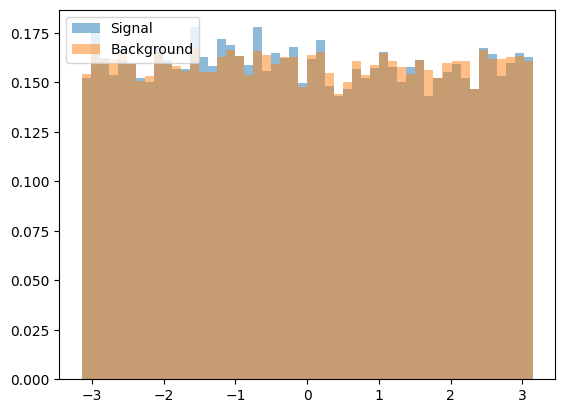

PRI_lep_pt


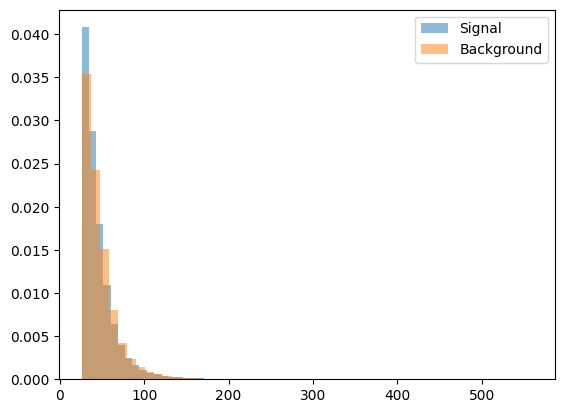

PRI_lep_eta


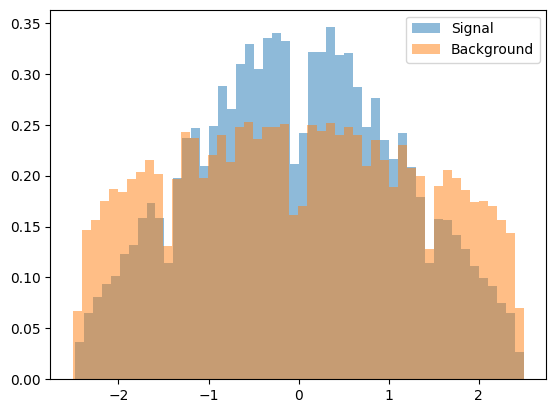

PRI_lep_phi


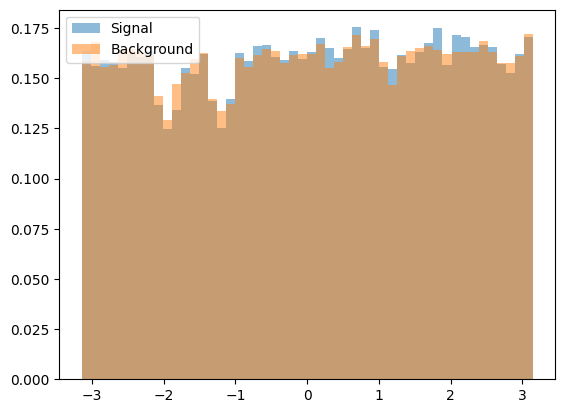

PRI_met


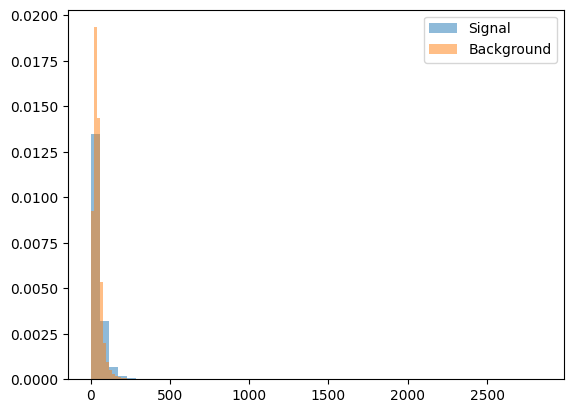

PRI_met_phi


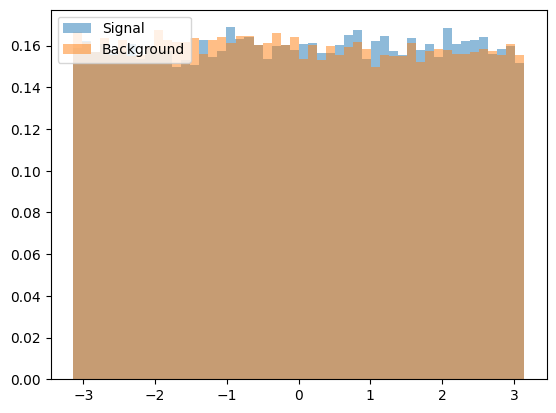

PRI_met_sumet


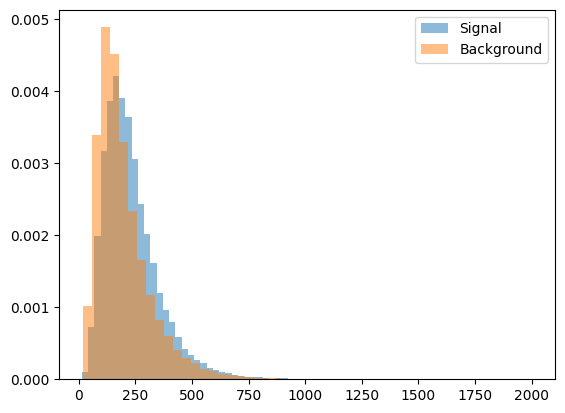

PRI_jet_num


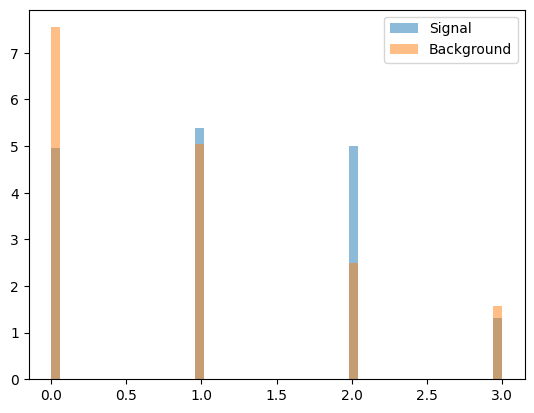

PRI_jet_leading_pt


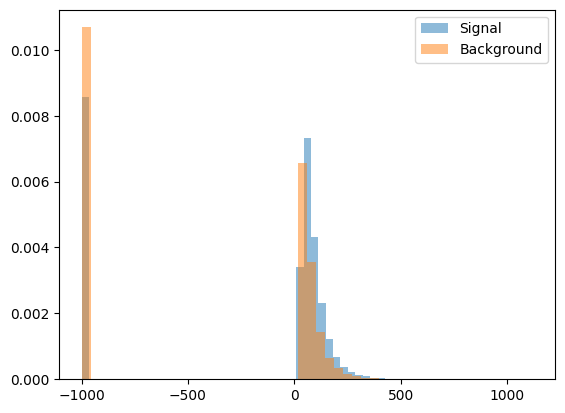

PRI_jet_leading_eta


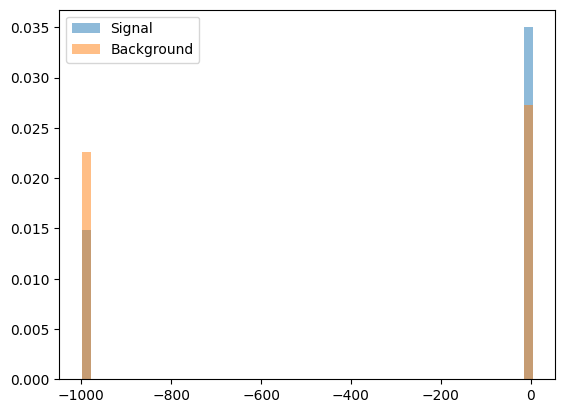

PRI_jet_leading_phi


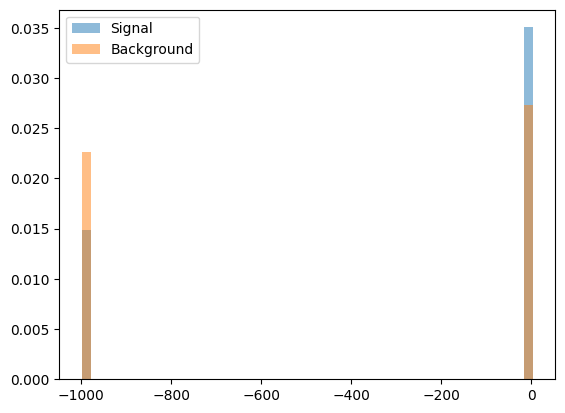

PRI_jet_subleading_pt


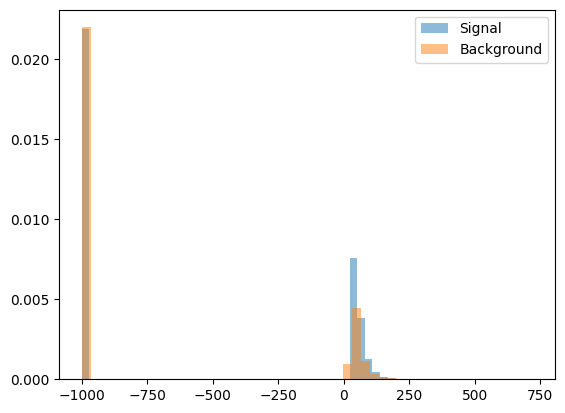

PRI_jet_subleading_eta


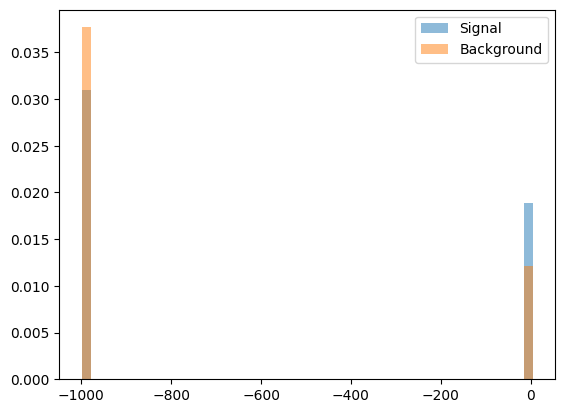

PRI_jet_subleading_phi


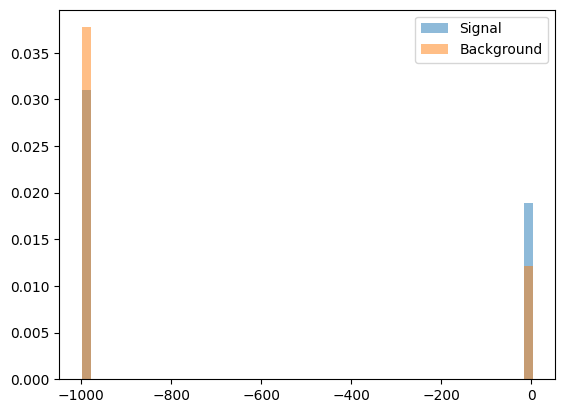

PRI_jet_all_pt


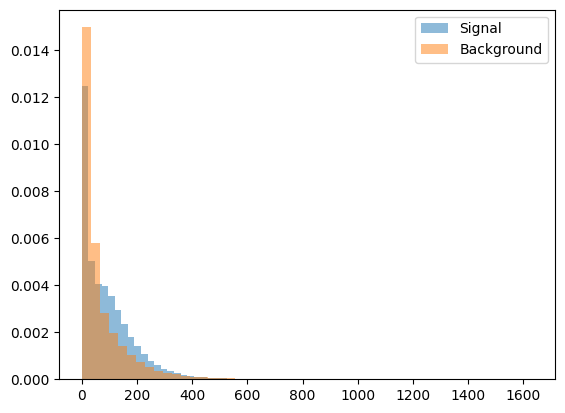

Weight


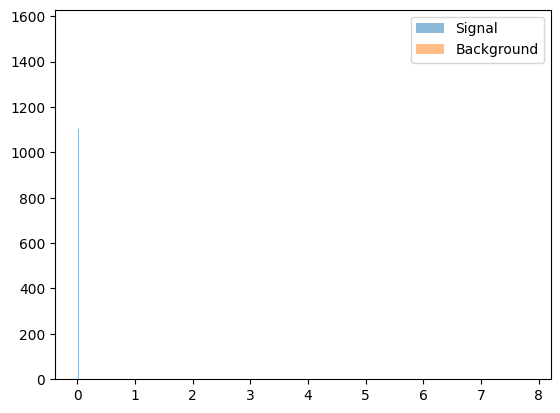

Label


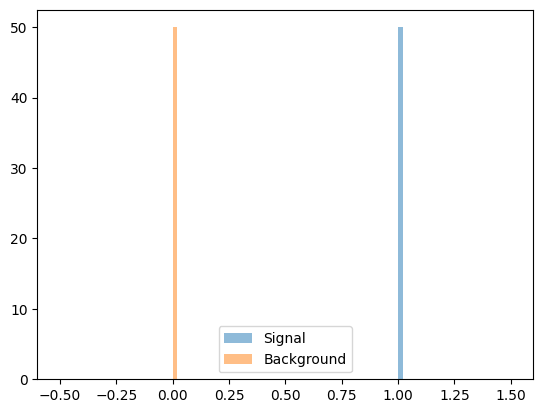

In [62]:
selection_dict={"Signal":data["Label"]==1.,"Background":data["Label"]!=1}

for column_name in data.columns:
    print(column_name)
    compare_distributions(data,column_name,
                     selection_dict,
                     alpha=0.5,
                     density=1,
                     bins=50,
                     )
    plt.show()

## B

Im not sure If i did this correctly, however I do believe that a smaller data set would help increase the speed so that it does not have to loop a quarter of a million instances every time. We could also trim down the columns to make sure we only keep the relevant ones. 

## C

* SUSY: l_1_eta, MET
* Higgs: PRI_tau_eta, DER mass _transverse_met_lep, DER_mass_MMC, weight

## 4.2

## A

Already downloaded

## B

In [63]:
x = df.cov()
y = df.corr()

a = data.cov()
b = data.corr()

In [64]:
x

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
signal,0.248199,0.132655,-0.000164,-0.000230,0.063489,0.000190,-0.000049,0.190830,0.000055,0.125406,0.038461,0.083519,0.123103,0.026257,0.033998,0.079884,0.084835,0.007095,0.026377
l_1_pT,0.132655,0.472428,-0.000263,-0.000229,0.307887,-0.000302,0.000227,0.230951,-0.000676,0.098567,-0.012512,0.368085,0.290831,-0.059285,-0.012778,0.346283,0.098083,-0.047023,0.022517
l_1_eta,-0.000164,-0.000263,1.006224,0.000322,-0.000378,0.405877,0.000297,-0.000558,-0.000541,-0.000497,-0.000498,-0.000308,-0.000266,0.000128,-0.000158,-0.000281,-0.000504,0.000080,0.000146
l_1_phi,-0.000230,-0.000229,0.000322,1.003342,-0.000129,0.000641,-0.268130,0.001200,-0.184184,0.001529,-0.001965,-0.000200,0.000838,0.000876,0.001754,0.000045,0.001312,0.000954,0.000299
l_2_pT,0.063489,0.307887,-0.000378,-0.000129,0.428004,-0.000454,0.000115,0.079704,-0.001388,-0.002259,0.049797,0.328115,0.164385,-0.099316,-0.069139,0.324622,0.005552,-0.004118,-0.027796
l_2_eta,0.000190,-0.000302,0.405877,0.000641,-0.000454,1.005686,-0.000065,0.000051,-0.000126,0.000130,-0.000170,-0.000549,-0.000167,0.000253,-0.000091,-0.000554,-0.000215,-0.000052,0.000199
l_2_phi,-0.000049,0.000227,0.000297,-0.268130,0.000115,-0.000065,1.003265,0.000004,-0.034468,0.000214,-0.000091,0.000287,0.000288,0.000235,0.001244,0.000384,0.000496,0.000244,-0.000199
MET,0.190830,0.230951,-0.000558,0.001200,0.079704,0.000051,0.000004,0.761933,-0.001622,0.548358,0.144805,0.145918,0.368099,0.188550,0.156388,0.167330,0.316608,0.145279,0.073258
MET_phi,0.000055,-0.000676,-0.000541,-0.184184,-0.001388,-0.000126,-0.034468,-0.001622,1.003311,-0.002920,-0.000953,-0.000976,-0.000842,-0.000163,0.000505,-0.001141,-0.000399,-0.001323,0.000058
MET_rel,0.125406,0.098567,-0.000497,0.001529,-0.002259,0.000130,0.000214,0.548358,-0.002920,0.792397,-0.125273,0.043706,0.303346,0.249511,0.410022,0.082417,0.415675,0.146597,0.055605


## C

In [66]:
from IPython.display import HTML, display
import tabulate

In [67]:
c

signal,0.248199,0.132655,-0.000163839,-0.000230407,0.0634893,0.000189843,-4.93688e-05,0.19083,5.47176e-05,0.125406,0.0384611,0.0835192,0.123103,0.0262571,0.033998,0.0798843,0.0848346,0.00709482,0.0263767
l_1_pT,0.132655,0.472428,-0.000262667,-0.000229061,0.307887,-0.000302457,0.000227164,0.230951,-0.000676375,0.0985665,-0.0125117,0.368085,0.290831,-0.0592849,-0.0127782,0.346283,0.0980831,-0.0470231,0.0225171
l_1_eta,-0.000163839,-0.000262667,1.00622,0.0003216,-0.000377896,0.405877,0.000297084,-0.000557684,-0.000540624,-0.000496646,-0.000497512,-0.000308117,-0.0002659,0.000127738,-0.000157618,-0.000281414,-0.000504145,7.96493e-05,0.000145749
l_1_phi,-0.000230407,-0.000229061,0.0003216,1.00334,-0.000128547,0.000641116,-0.26813,0.00120012,-0.184184,0.00152891,-0.00196469,-0.000199693,0.000837778,0.000876413,0.00175405,4.49584e-05,0.00131238,0.000953611,0.0002995
l_2_pT,0.0634893,0.307887,-0.000377896,-0.000128547,0.428004,-0.000454288,0.000114726,0.079704,-0.00138807,-0.00225873,0.0497971,0.328115,0.164385,-0.0993157,-0.0691387,0.324622,0.00555216,-0.0041175,-0.0277963
l_2_eta,0.000189843,-0.000302457,0.405877,0.000641116,-0.000454288,1.00569,-6.47266e-05,5.11899e-05,-0.000125592,0.000129885,-0.000170132,-0.000548914,-0.000167207,0.000253423,-9.06262e-05,-0.000553613,-0.000214547,-5.15597e-05,0.000198699
l_2_phi,-4.93688e-05,0.000227164,0.000297084,-0.26813,0.000114726,-6.47266e-05,1.00326,4.32091e-06,-0.0344684,0.000214381,-9.13545e-05,0.000286821,0.000288007,0.00023464,0.00124351,0.000383544,0.000496384,0.000243671,-0.000198602
MET,0.19083,0.230951,-0.000557684,0.00120012,0.079704,5.11899e-05,4.32091e-06,0.761933,-0.00162175,0.548358,0.144805,0.145918,0.368099,0.18855,0.156388,0.16733,0.316608,0.145279,0.0732584
MET_phi,5.47176e-05,-0.000676375,-0.000540624,-0.184184,-0.00138807,-0.000125592,-0.0344684,-0.00162175,1.00331,-0.00291959,-0.000953142,-0.000975646,-0.000842059,-0.000163381,0.000505462,-0.00114068,-0.000398585,-0.00132321,5.77751e-05
MET_rel,0.125406,0.0985665,-0.000496646,0.00152891,-0.00225873,0.000129885,0.000214381,0.548358,-0.00291959,0.792397,-0.125273,0.043706,0.303346,0.249511,0.410022,0.0824171,0.415675,0.146597,0.055605
axial_MET,0.0384611,-0.0125117,-0.000497512,-0.00196469,0.0497971,-0.000170132,-9.13545e-05,0.144805,-0.000953142,-0.125273,1.00319,0.0151046,-0.188739,-0.18164,-0.460312,-0.0434172,-0.234103,-0.0262092,-0.0541256


## D

In [68]:
def table(data):
    x = data.cov()
    y = data.corr()
    
    print("Covariance Table")
    display(HTML(tabulate.tabulate(x, tablefmt='html')))
    print("Correlation Table")
    display(HTML(tabulate.tabulate(y, tablefmt='html')))
    

In [69]:
table(data)

Covariance Table


DER_mass_MMC,165117,-6545.66,2796.31,5141.29,30039.6,42918.3,29917.3,72.5675,414.758,9472.19,-5.8603,174.1,29974.2,1197.54,1.27236,-4.55995,891.619,5.17105,-0.549568,-3124.09,5.4572,11410.6,87.8061,54176.1,49130.2,49128.7,31752.2,29958.5,29957.9,7383.03,-249.34,46.1205
DER_mass_transverse_met_lep,-6545.66,1249.26,274.344,-560.487,-2833.39,-4427.75,-2817.17,1.19685,13.9797,-600.506,10.4352,-17.7084,-2825.89,-115.23,-0.0905077,0.0726948,242.268,-0.303007,0.0218519,213.6,-1.02006,-750.3,-7.27343,-4326.49,-3811.43,-3811.13,-2999.36,-2824.07,-2824.01,-727.545,27.8253,-5.89512
DER_mass_vis,2796.31,274.344,1666.98,-162.597,-598.445,-1091.22,-594.208,18.5306,-0.638519,418.961,3.3624,-4.42715,-596.704,265.376,0.105414,-0.268821,365.292,0.1134,-0.14964,-117.289,-0.108528,275.287,-1.0719,-416.725,-274.699,-274.555,-650.25,-596.103,-596.18,-211.708,7.82207,-0.272355
DER_pt_h,5141.29,-560.487,-162.597,4052.05,15149.7,22388.1,15100.3,-26.8809,440.239,6133.37,4.79584,40.9794,15121.9,581.25,0.128706,0.606895,506.959,0.67271,-0.338013,1423.01,0.990342,6301.39,38.7873,21088.4,17596.1,17595.8,16240.1,15114.6,15114.5,5045.16,-49.4255,5.81644
DER_deltaeta_jet_jet,30039.6,-2833.39,-598.445,15149.7,206553,282901,205885,-106.416,2742.07,35337.7,15.8586,199.892,206151,1915.82,2.68479,2.72636,1685.1,4.98882,0.0572507,4568.14,4.31981,35593,385.371,132017,116014,116014,217952,206053,206056,31736.8,-336.938,30.5527
DER_mass_jet_jet,42918.3,-4427.75,-1091.22,22388.1,282901,432928,281514,-156.472,3631.17,51822.7,15.382,290.423,282213,3009.86,2.86315,3.97028,2381.34,6.32707,-0.712804,6893.48,6.16117,51359.6,523.622,182928,158807,158808,299216,282058,282061,46431.5,-486.108,59.8838
DER_prodeta_jet_jet,29917.3,-2817.17,-594.208,15100.3,205885,281514,205227,-106.077,2738.87,35232.6,15.925,199.08,205486,1908.14,2.68389,2.72321,1682,4.9812,0.0573126,4555.19,4.31379,35495.1,384.23,131592,115640,115641,217251,205390,205392,31642.5,-335.54,30.2198
DER_deltar_tau_lep,72.5675,1.19685,18.5306,-26.8809,-106.416,-156.472,-106.077,0.61295,-2.58226,-39.1885,0.0311144,-0.191979,-106.223,-3.54504,0.00345249,-0.0159717,-1.20849,0.000692098,-0.001103,-10.3618,-0.00222721,-40.3086,-0.26623,-140.138,-116.527,-116.52,-113.993,-106.171,-106.17,-34.435,0.290497,0.00455007
DER_pt_tot,414.758,13.9797,-0.638519,440.239,2742.07,3631.17,2738.87,-2.58226,496.109,982.317,0.737429,4.74409,2738.54,47.7998,0.0972394,0.0587638,53.8725,0.225027,-0.171942,197.632,0.10151,1264.89,7.84635,2408.86,2033.42,2033.68,2984.26,2737.69,2737.63,880.645,-9.16775,-0.161604
DER_sum_pt,9472.19,-600.506,418.961,6133.37,35337.7,51822.7,35232.6,-39.1885,982.317,13387.9,10.6335,58.0979,35275.3,1259.91,0.28617,0.826362,1176.8,1.28522,-0.397659,1979.67,1.40742,13238.7,85.7823,39392.6,32760.9,32760.9,38171.2,35259.2,35259,10951.2,-90.0012,8.41486
DER_pt_ratio_lep_tau,-5.8603,10.4352,3.3624,4.79584,15.8586,15.382,15.925,0.0311144,0.737429,10.6335,0.713591,-0.0391237,15.8675,-8.98596,0.000626572,5.57065e-06,13.0687,0.00251866,-0.00775415,1.48346,-0.00181575,5.33267,0.0464953,22.1011,17.9083,17.9041,17.2489,15.8692,15.8699,6.55068,0.298418,-0.0783384


Correlation Table


DER_mass_MMC,1,-0.455755,0.168548,0.198765,0.162661,0.160524,0.162521,0.228105,0.0458259,0.201464,-0.0170726,0.358963,0.162623,0.131495,0.00257909,-0.00617683,0.0994446,0.01006,-0.000744499,-0.233724,0.00741075,0.221984,0.221078,0.250158,0.247083,0.247078,0.162836,0.162614,0.162609,0.185372,-0.327244,0.239149
DER_mass_transverse_met_lep,-0.455755,1,0.190109,-0.249116,-0.176386,-0.190392,-0.175942,0.0432514,0.0177575,-0.146837,0.349504,-0.419757,-0.176262,-0.145464,-0.00210917,0.00113208,0.310648,-0.00677707,0.00034033,0.183716,-0.0159253,-0.167811,-0.210537,-0.229674,-0.22037,-0.220355,-0.176837,-0.176231,-0.176225,-0.210009,0.419843,-0.351428
DER_mass_vis,0.168548,0.190109,1,-0.062562,-0.032251,-0.0406198,-0.0321259,0.579712,-0.000702134,0.0886852,0.0974898,-0.0908459,-0.0322198,0.290011,0.0021266,-0.0036241,0.405482,0.00219566,-0.00201753,-0.0873304,-0.00146677,0.0533004,-0.02686,-0.0191508,-0.0137494,-0.0137423,-0.0331884,-0.0322025,-0.0322063,-0.0529024,0.102172,-0.0140553
DER_pt_h,0.198765,-0.249116,-0.062562,1,0.523664,0.534531,0.523639,-0.539379,0.310501,0.832733,0.0891874,0.539356,0.52372,0.407421,0.00166539,0.00524781,0.360939,0.00835423,-0.00292304,0.679585,0.00858492,0.782547,0.623401,0.621599,0.564898,0.564894,0.531647,0.523714,0.523703,0.808616,-0.414084,0.192526
DER_deltaeta_jet_jet,0.162661,-0.176386,-0.032251,0.523664,1,0.946045,0.999981,-0.299076,0.270878,0.671996,0.0413072,0.368492,0.999998,0.188086,0.00486572,0.00330195,0.168039,0.00867758,6.93431e-05,0.305561,0.00524491,0.6191,0.867521,0.545027,0.521657,0.521664,0.999346,0.999995,0.999996,0.712446,-0.395375,0.141646
DER_mass_jet_jet,0.160524,-0.190392,-0.0406198,0.534531,0.946045,1,0.944443,-0.303751,0.247771,0.6807,0.0276745,0.369803,0.945584,0.204106,0.00358417,0.00332135,0.164026,0.0076017,-0.000596349,0.318497,0.00516707,0.617057,0.814191,0.521645,0.493233,0.493241,0.947652,0.945505,0.945507,0.719962,-0.394004,0.191766
DER_prodeta_jet_jet,0.162521,-0.175942,-0.0321259,0.523639,0.999981,0.944443,1,-0.299083,0.271435,0.672158,0.0416138,0.368177,0.99999,0.187936,0.00487979,0.00330877,0.16827,0.00869225,6.96419e-05,0.305678,0.00525448,0.619388,0.867741,0.545022,0.521653,0.521661,0.999347,0.999988,0.999989,0.71262,-0.395004,0.140554
DER_deltar_tau_lep,0.228105,0.0432514,0.579712,-0.539379,-0.299076,-0.303751,-0.299083,1,-0.148081,-0.432603,0.0470462,-0.205441,-0.299115,-0.202035,0.00363223,-0.011229,-0.0699567,0.000698829,-0.000775534,-0.402345,-0.00156977,-0.407002,-0.347904,-0.335851,-0.304161,-0.304145,-0.303416,-0.299107,-0.299101,-0.448737,0.197881,0.0122455
DER_pt_tot,0.0458259,0.0177575,-0.000702134,0.310501,0.270878,0.247771,0.271435,-0.148081,1,0.38116,0.0391929,0.178448,0.271058,0.0957537,0.0035959,0.00145219,0.109617,0.00798659,-0.00424945,0.269739,0.00251484,0.448925,0.360409,0.20292,0.186564,0.18659,0.279203,0.2711,0.271091,0.403382,-0.219507,-0.0152874
DER_sum_pt,0.201464,-0.146837,0.0886852,0.832733,0.671996,0.6807,0.672158,-0.432603,0.38116,1,0.108791,0.420679,0.672116,0.485847,0.00203714,0.00393111,0.460938,0.00878088,-0.00189188,0.520129,0.00671205,0.904481,0.758503,0.638796,0.578616,0.578621,0.687465,0.672125,0.672114,0.965628,-0.414827,0.153236
DER_pt_ratio_lep_tau,-0.0170726,0.349504,0.0974898,0.0891874,0.0413072,0.0276745,0.0416138,0.0470462,0.0391929,0.108791,1,-0.0388027,0.0414107,-0.474633,0.000610942,3.6298e-06,0.701142,0.00235701,-0.00505298,0.0533856,-0.00118609,0.0499036,0.056312,0.0490898,0.0433231,0.0433135,0.0425508,0.0414346,0.041436,0.0791164,0.188398,-0.195398
